In [505]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [506]:
df=pd.read_csv(r"C:\Users\hp\Downloads\carInsurance_data.csv")

In [507]:
df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [508]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   object
 17  CallEnd       

In [509]:
df.isna().sum()

Id                     0
Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

In [510]:
df=df.drop('Job',axis=1)

In [511]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Marital           4000 non-null   object
 3   Education         3831 non-null   object
 4   Default           4000 non-null   int64 
 5   Balance           4000 non-null   int64 
 6   HHInsurance       4000 non-null   int64 
 7   CarLoan           4000 non-null   int64 
 8   Communication     3098 non-null   object
 9   LastContactDay    4000 non-null   int64 
 10  LastContactMonth  4000 non-null   object
 11  NoOfContacts      4000 non-null   int64 
 12  DaysPassed        4000 non-null   int64 
 13  PrevAttempts      4000 non-null   int64 
 14  Outcome           958 non-null    object
 15  CallStart         4000 non-null   object
 16  CallEnd           4000 non-null   object
 17  CarInsurance  

In [512]:
for i in ['Education','Communication','Outcome']:
    df[i].fillna(df[i].mode()[0],inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_15804\3054307689.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [513]:
df.isna().sum()

Id                  0
Age                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
Outcome             0
CallStart           0
CallEnd             0
CarInsurance        0
dtype: int64

<Axes: >

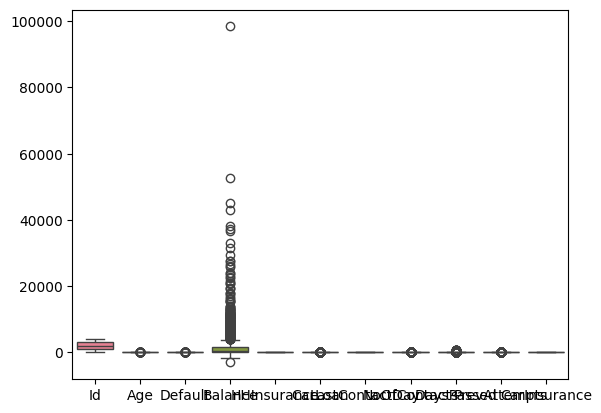

In [514]:
sns.boxplot(df)

In [515]:
for i in df:
    if df[i].dtypes in ('int64','float64'):
      q1=df[i].quantile(0.25)
      q3=df[i].quantile(0.75)
      iqr=q3-q1
      ul=q3+1.5*iqr
      ll=q1-1.5*iqr
      df[i].clip(upper=ul,lower=ll,inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_15804\3209262019.py:8: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\hp\AppData\Local\Temp\ipykernel_15804\3209262019.py:8: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

<Axes: >

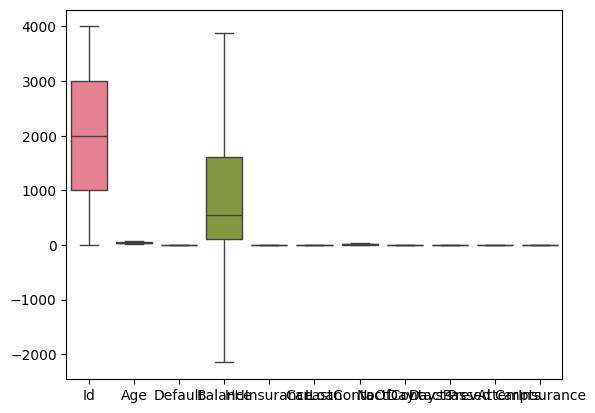

In [516]:
sns.boxplot(df)

In [517]:
df.CarInsurance.value_counts()

CarInsurance
0    2396
1    1604
Name: count, dtype: int64

In [518]:
import plotly.express as px
fig=px.pie(df,names='CarInsurance',color='CarInsurance',
          color_discrete_map={'0':'red',
                             '1':'yes'})
fig.show()

In [519]:
dfnumber=df.select_dtypes(include=np.number)
dfnumber.head()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
0,1,32.0,0,1218,1,0,28,2,-1,0,0
1,2,32.0,0,1156,1,0,26,5,-1,0,0
2,3,29.0,0,637,1,0,3,1,-1,0,1
3,4,25.0,0,373,1,0,11,2,-1,0,1
4,5,30.0,0,2694,0,0,3,1,-1,0,0


In [520]:
dfcat=df.select_dtypes(include=object)
dfcat.head()

,Marital,Education,Communication,LastContactMonth,Outcome,CallStart,CallEnd
0,single,tertiary,telephone,jan,failure,13:45:20,13:46:30
1,married,primary,cellular,may,failure,14:49:03,14:52:08
2,single,tertiary,cellular,jun,failure,16:30:24,16:36:04
3,single,primary,cellular,may,failure,12:06:43,12:20:22
4,married,tertiary,cellular,jun,failure,14:35:44,14:38:56


In [521]:
dfcat.head()

,Marital,Education,Communication,LastContactMonth,Outcome,CallStart,CallEnd
0,single,tertiary,telephone,jan,failure,13:45:20,13:46:30
1,married,primary,cellular,may,failure,14:49:03,14:52:08
2,single,tertiary,cellular,jun,failure,16:30:24,16:36:04
3,single,primary,cellular,may,failure,12:06:43,12:20:22
4,married,tertiary,cellular,jun,failure,14:35:44,14:38:56


In [522]:
dfcatt=dfcat.drop(['CallStart','CallEnd'],axis=1)

### LabelEncoder

In [524]:
from sklearn.preprocessing import LabelEncoder
dfdummies=dfcatt.apply(LabelEncoder().fit_transform)
dfdummies.head()

,Marital,Education,Communication,LastContactMonth,Outcome
0,2,2,1,4,0
1,1,0,0,8,0
2,2,2,0,6,0
3,2,0,0,8,0
4,1,2,0,6,0


In [525]:
dfcombined=pd.concat([dfnumber,dfdummies],axis=1)
dfcombined.head()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance,Marital,Education,Communication,LastContactMonth,Outcome
0,1,32.0,0,1218,1,0,28,2,-1,0,0,2,2,1,4,0
1,2,32.0,0,1156,1,0,26,5,-1,0,0,1,0,0,8,0
2,3,29.0,0,637,1,0,3,1,-1,0,1,2,2,0,6,0
3,4,25.0,0,373,1,0,11,2,-1,0,1,2,0,0,8,0
4,5,30.0,0,2694,0,0,3,1,-1,0,0,1,2,0,6,0


In [526]:
DF=dfcombined.drop('Id',axis=1)
DF.head()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance,Marital,Education,Communication,LastContactMonth,Outcome
0,32.0,0,1218,1,0,28,2,-1,0,0,2,2,1,4,0
1,32.0,0,1156,1,0,26,5,-1,0,0,1,0,0,8,0
2,29.0,0,637,1,0,3,1,-1,0,1,2,2,0,6,0
3,25.0,0,373,1,0,11,2,-1,0,1,2,0,0,8,0
4,30.0,0,2694,0,0,3,1,-1,0,0,1,2,0,6,0


### Data Partitioning

In [528]:
from sklearn.model_selection import train_test_split
x=DF.drop('CarInsurance',axis=1)
y=DF['CarInsurance']

X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=99)

In [529]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               4000 non-null   float64
 1   Default           4000 non-null   int64  
 2   Balance           4000 non-null   int64  
 3   HHInsurance       4000 non-null   int64  
 4   CarLoan           4000 non-null   int64  
 5   LastContactDay    4000 non-null   int64  
 6   NoOfContacts      4000 non-null   int64  
 7   DaysPassed        4000 non-null   int64  
 8   PrevAttempts      4000 non-null   int64  
 9   CarInsurance      4000 non-null   int64  
 10  Marital           4000 non-null   int64  
 11  Education         4000 non-null   int64  
 12  Communication     4000 non-null   int64  
 13  LastContactMonth  4000 non-null   int64  
 14  Outcome           4000 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 468.9 KB


In [530]:
independent_variables=list(x.columns)
independent_variables

['Age',
 'Default',
 'Balance',
 'HHInsurance',
 'CarLoan',
 'LastContactDay',
 'NoOfContacts',
 'DaysPassed',
 'PrevAttempts',
 'Marital',
 'Education',
 'Communication',
 'LastContactMonth',
 'Outcome']

In [531]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4000 entries, 0 to 3999
Series name: CarInsurance
Non-Null Count  Dtype
--------------  -----
4000 non-null   int64
dtypes: int64(1)
memory usage: 31.4 KB


In [581]:
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
Model = RandomForestClassifier(random_state=20,n_estimators=25, # make 25 tress
                               criterion="gini",
                               max_depth=4,  # each tree will have 4 branches
                               min_samples_split=100,# each tree will have parent node
                               min_samples_leaf=50,# each tree will have Child node
                               max_features="sqrt")# n_estimators means number tree we want  

Model.fit(X_train, y_train)

,n_estimators,25
,criterion,'gini'
,max_depth,4
,min_samples_split,100
,min_samples_leaf,50
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [533]:
CarInsurance=['0','1']

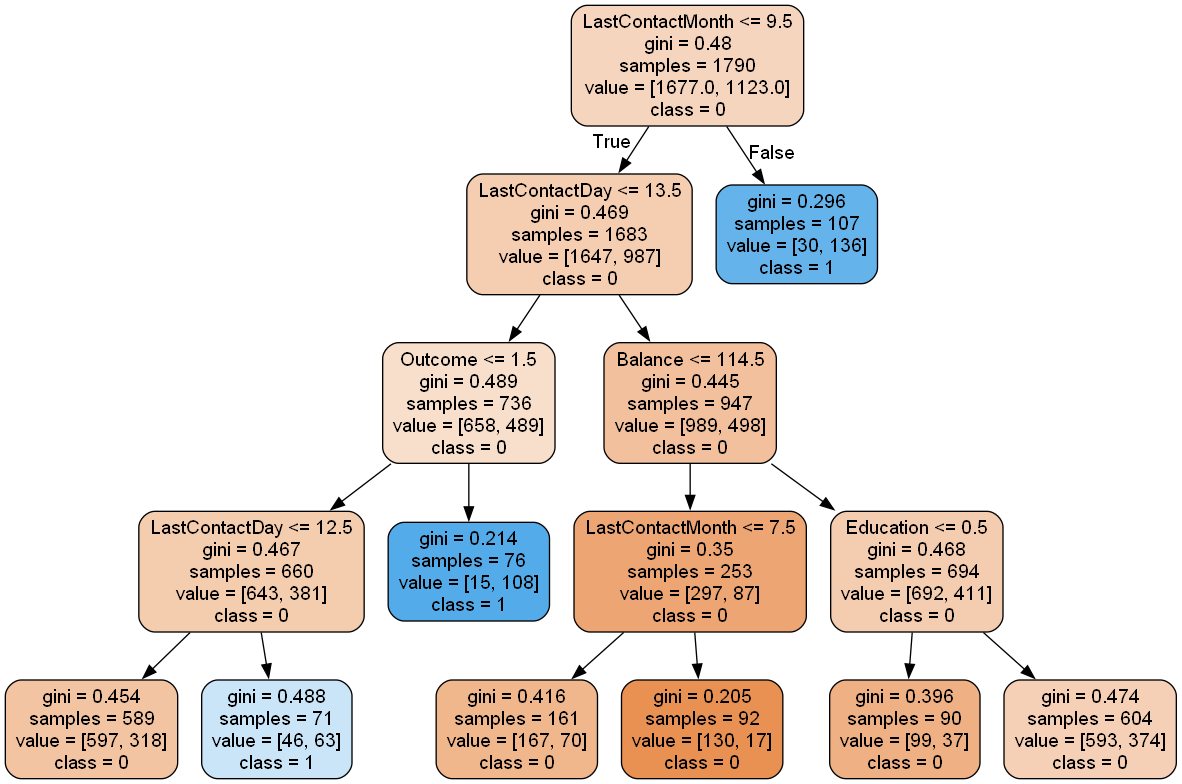

In [583]:
from sklearn.tree import export_graphviz
import pydot

tree=model.estimators_[5]

export_graphviz(tree,out_file='abc.dot',
                feature_names=independent_variables,
                class_names=CarInsurance,
               filled=True,
               rounded=True)

(graph,)=pydot.graph_from_dot_file('abc.dot')
graph.write_png('tree.png')

from IPython.display import Image
Image(filename='tree.png')

In [535]:
Train=pd.concat([X_train,y_train],axis=1)

In [585]:
Train.head()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,Marital,Education,Communication,LastContactMonth,Outcome,CarInsurance,preds
3468,52.0,0,2398,1,0,3,1,-1,0,2,1,0,9,0,1,0
2488,38.0,0,3881,0,0,16,1,-1,0,1,1,0,11,0,1,1
725,38.0,0,1727,0,0,2,2,-1,0,2,2,1,1,1,0,1
1211,33.0,0,119,0,0,21,3,-1,0,2,2,0,5,0,0,0
962,31.0,0,0,0,0,27,6,-1,0,0,2,0,1,0,1,0


In [587]:
Train['preds']=model.predict(X_train)
Train.head()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,Marital,Education,Communication,LastContactMonth,Outcome,CarInsurance,preds
3468,52.0,0,2398,1,0,3,1,-1,0,2,1,0,9,0,1,0
2488,38.0,0,3881,0,0,16,1,-1,0,1,1,0,11,0,1,1
725,38.0,0,1727,0,0,2,2,-1,0,2,2,1,1,1,0,1
1211,33.0,0,119,0,0,21,3,-1,0,2,2,0,5,0,0,0
962,31.0,0,0,0,0,27,6,-1,0,0,2,0,1,0,1,0


In [589]:
from sklearn.metrics import classification_report
Report=classification_report(Train['preds'],Train['CarInsurance'])
print(Report)

              precision    recall  f1-score   support

           0       0.96      0.67      0.79      2373
           1       0.31      0.83      0.45       427

    accuracy                           0.70      2800
   macro avg       0.63      0.75      0.62      2800
weighted avg       0.86      0.70      0.74      2800



In [539]:
Test=pd.concat([X_test,y_test],axis=1)

In [591]:
Test['preds']=model.predict(X_test)
Test.head()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,Marital,Education,Communication,LastContactMonth,Outcome,CarInsurance,preds
3796,34.0,0,176,0,0,18,4,-1,0,1,2,0,1,0,0,0
3906,43.0,0,591,1,0,8,2,-1,0,1,2,0,1,0,0,0
1030,36.0,0,82,1,0,10,1,-1,0,0,1,0,5,0,0,0
1813,48.0,0,2805,0,0,23,2,-1,0,0,0,0,5,0,0,0
1104,41.0,0,167,0,0,20,1,-1,0,1,1,0,6,0,0,0


In [593]:
from sklearn.metrics import classification_report
Report=classification_report(Test['preds'],Test['CarInsurance'])
print(Report)

              precision    recall  f1-score   support

           0       0.95      0.67      0.79      1031
           1       0.28      0.79      0.41       169

    accuracy                           0.69      1200
   macro avg       0.62      0.73      0.60      1200
weighted avg       0.86      0.69      0.73      1200

